In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 4)

In [2]:
#Downloading the dataset
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg

Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /content/mobilesales.xlsx
100% 13.7k/13.7k [00:00<00:00, 25.3MB/s]


In [4]:
mobile_sales = pd.read_excel("mobilesales.xlsx")

In [5]:
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [6]:
mobile_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    217 non-null    datetime64[ns]
 1   Sales   198 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


In [7]:
#if the timestamp column was not of Datetime format : pd.to_datetime(column_name)

#Basic EDA

In [8]:
#Missing values
mobile_sales[mobile_sales.Sales.isna()]

,DATE,Sales
14,2002-03-01,NaN
15,2002-04-01,NaN
16,2002-05-01,NaN
34,2003-11-01,NaN
57,2005-10-01,NaN
75,2007-04-01,NaN
98,2009-03-01,NaN
120,2011-01-01,NaN
125,2011-06-01,NaN
136,2012-05-01,NaN


In [9]:
len(mobile_sales[mobile_sales.Sales.isna()])

19

In [10]:
mobile_sales.Sales.describe()

count      198.000000
mean     10842.757576
std       2605.006293
min        108.000000
25%       8856.000000
50%      10745.000000
75%      12399.750000
max      23740.000000
Name: Sales, dtype: float64

In [11]:
mobile_sales.DATE.describe()

count                              217
mean     2009-12-31 04:25:26.267281152
min                2001-01-01 00:00:00
25%                2005-07-01 00:00:00
50%                2010-01-01 00:00:00
75%                2014-07-01 00:00:00
max                2019-01-01 00:00:00
Name: DATE, dtype: object

In [12]:
#total no. of months in our dataset
18*12 + 1

217

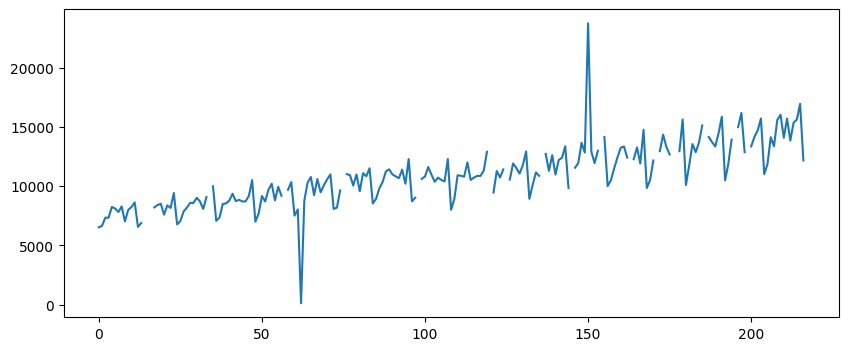

In [15]:
mobile_sales.Sales.plot()
plt.show()

In [21]:
#Make the timestamp column index
mobile_sales.set_index("DATE",inplace=True)

In [22]:
mobile_sales.head()

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0


#Imputing Missing Values

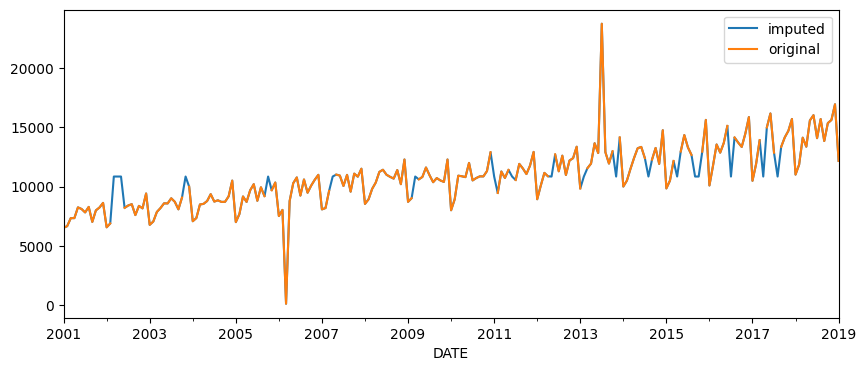

In [23]:
#Median/Mean imputation
mobile_sales.Sales.fillna(mobile_sales.Sales.mean()).plot(label="imputed")
mobile_sales.Sales.plot(label="original")
plt.legend()

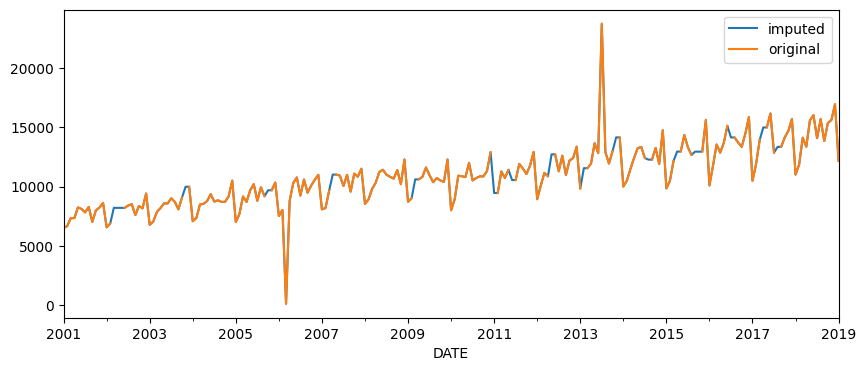

In [24]:
#BackFill
mobile_sales.Sales.fillna(method="bfill").plot(label="imputed")
mobile_sales.Sales.plot(label="original")
plt.legend()

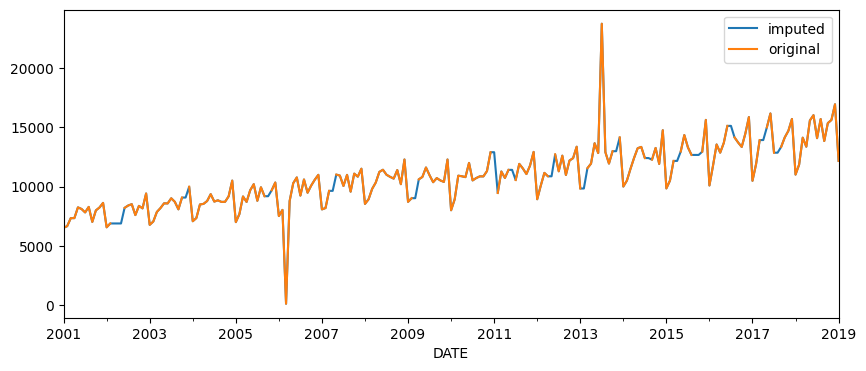

In [25]:
#Forward Fill
mobile_sales.Sales.fillna(method="ffill").plot(label="imputed")
mobile_sales.Sales.plot(label="original")
plt.legend()

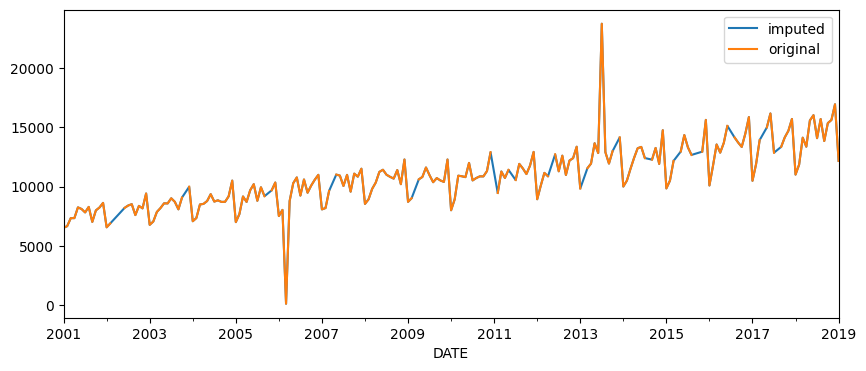

In [26]:
#Linear Interpolation
mobile_sales.Sales.interpolate(method="linear").plot(label="imputed")
mobile_sales.Sales.plot(label="original")
plt.legend()

In [27]:
mobile_sales.Sales = mobile_sales.Sales.interpolate(method="linear")

#Handling ANomalies

[]

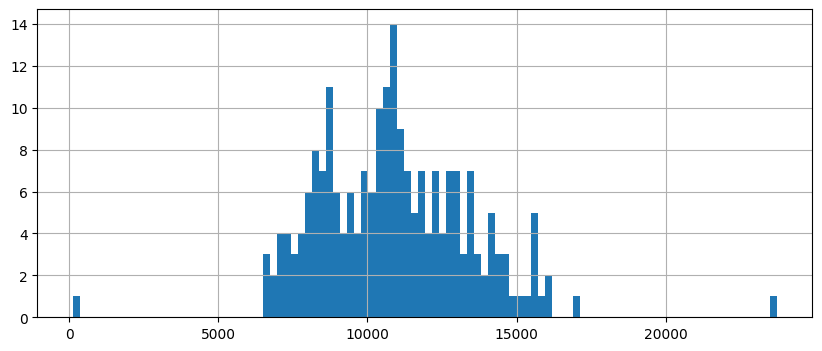

In [28]:
#Histogram
mobile_sales.Sales.hist(bins=100).plot()

In [29]:
#2.5 percentile
print(mobile_sales.Sales.quantile(0.025))
print(mobile_sales.Sales.quantile(0.975))

6926.8
15701.2


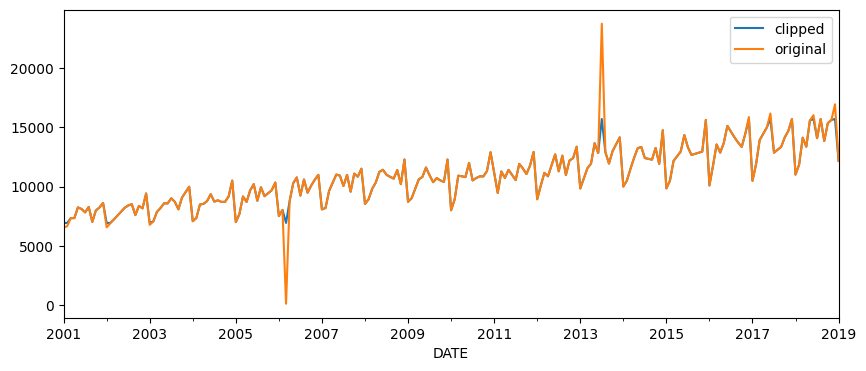

In [31]:
mobile_sales.Sales.clip(lower = mobile_sales.Sales.quantile(0.025),upper = mobile_sales.Sales.quantile(0.975)).plot(label="clipped")
mobile_sales.Sales.plot(label="original")
plt.legend()

In [32]:
mobile_sales.Sales = mobile_sales.Sales.clip(lower = mobile_sales.Sales.quantile(0.025),upper = mobile_sales.Sales.quantile(0.975))

#*Trend* - Moving Average

In [33]:
mobile_sales.Sales.head(10)

DATE
2001-01-01    6926.8
2001-02-01    6926.8
2001-03-01    7332.0
2001-04-01    7332.0
2001-05-01    8240.0
2001-06-01    8104.0
2001-07-01    7813.0
2001-08-01    8279.0
2001-09-01    7014.0
2001-10-01    7985.0
Name: Sales, dtype: float64

In [34]:
mobile_sales.Sales.rolling(window=3).mean()

DATE
2001-01-01             NaN
2001-02-01             NaN
2001-03-01     7061.866667
2001-04-01     7196.933333
2001-05-01     7634.666667
                  ...     
2018-09-01    14538.333333
2018-10-01    14962.000000
2018-11-01    14934.666667
2018-12-01    15555.733333
2019-01-01    14492.066667
Name: Sales, Length: 217, dtype: float64

In [35]:
(6926.8+6926.8+7332.0)/3

7061.866666666666

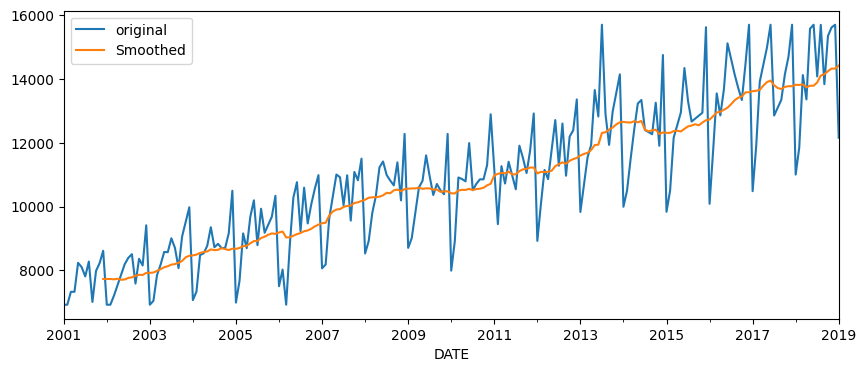

In [39]:
mobile_sales.Sales.plot(label="original")
mobile_sales.Sales.rolling(window=12).mean().plot(label = "Smoothed")
plt.legend()

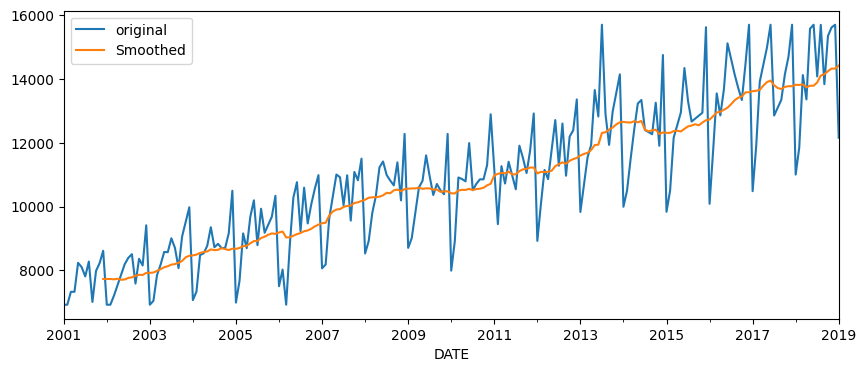

In [47]:
mobile_sales.Sales.plot(label="original")
mobile_sales.Sales.rolling(window=12).mean().plot(label = "Smoothed")
plt.legend()

#Decomposition